In [1]:
!conda install python-graphviz  --yes

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
python-graphviz           0.8.3                    py36_0    conda-forge


Some imports:

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz

train_df = pd.read_csv('./train_data.csv')
test_df = pd.read_csv('./test_data.csv')

In [3]:
X = train_df.drop(['ARR_DEL15'],axis=1)
y = pd.DataFrame(train_df.ARR_DEL15.astype('int', copy=False))
X_test = test_df.drop(['ARR_DEL15'],axis=1)
y_test = pd.DataFrame(test_df.ARR_DEL15.astype('int', copy=False))
# train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
# predict
y_predict = clf.predict(X_test)
# calculate accuracy
accuracy_score(y_test, y_predict)

1.0

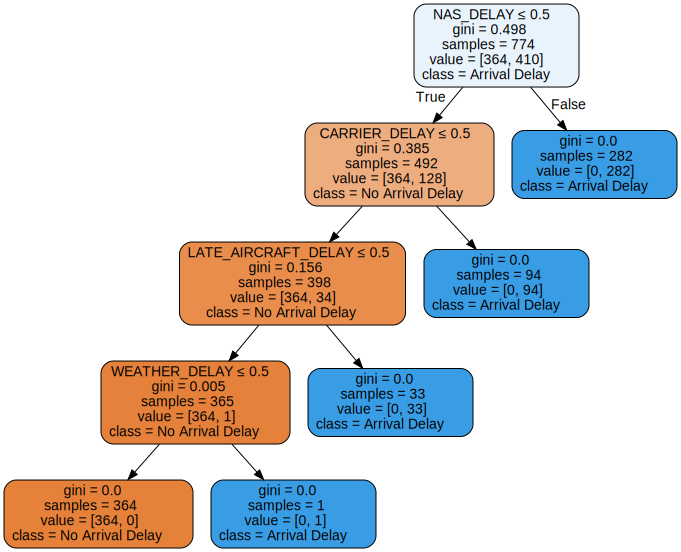

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         class_names=['No Arrival Delay','Arrival Delay'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [5]:
# save graph
graph.render("flights_decision_tree")

'flights_decision_tree.pdf'